In [7]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import manifold
from sklearn import discriminant_analysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Task 1: Binary classification.

Explore the data to generate summary statistics and plots that help the reader understand
the data, with a focus on information relevant to the classification task.

Load the data, check for missing variables.

In [8]:
# Load Data
def load_data(file_path):
    return pd.read_csv(file_path, compression='gzip')


In [9]:
file_path = "Datasets/data1.csv.gz" 
label_column = "label" 

# Load the dataset
df = load_data(file_path)

In [10]:
df

,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,TREG,0.000000,0.0,0.000000,0.00000,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,TREG,0.000000,0.0,0.000000,0.00000,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,CD4+T,3.568377,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,CD4+T,2.574454,0.0,0.000000,0.00000,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,CD4+T,0.000000,0.0,0.000000,0.00000,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,2.786860,0.0,0.000000,2.78686,2.786860,2.786860,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448715,0.000000,0.000000,0.000000
5467,TREG,0.000000,0.0,2.804178,0.00000,3.861582,0.000000,0.000000,0.000000,2.804178,...,0.000000,0.000000,3.466579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.804178
5468,TREG,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.953102,2.953102,...,0.000000,0.000000,0.000000,0.000000,2.953102,0.000000,0.000000,0.000000,0.000000,3.619814
5469,CD4+T,0.000000,0.0,0.000000,0.00000,4.067406,3.391236,3.391236,3.391236,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.391236,0.000000,0.000000,0.000000


<Axes: >

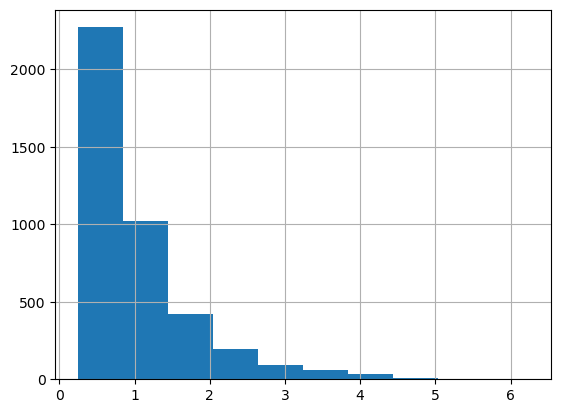

In [42]:
# Average genetic across our sample for different genes.
(df.sum().iloc[1:]/5471).hist()

In [11]:
# No missing values
sum(df.isna().sum())

0

Balanced problem? 

In [12]:
# Not fully balanced class.

df["label"].value_counts()

label
CD4+T    3356
TREG     2115
Name: count, dtype: int64

What type of regressors do we have, numerical, categorical/binary?
All numerical according.

In [13]:
df.dtypes

label          object
DPM1          float64
NIPAL3        float64
KRIT1         float64
LAP3          float64
               ...   
TRG.AS1       float64
EBLN3P        float64
TRBV7.2       float64
AC010642.2    float64
POLR2J3.1     float64
Length: 4124, dtype: object

Sparsity?

Difference in values of X for different lables.

### Visual analysis is tough given so many variables, let's use PCA.

In [14]:

# Separate x and y

regressors = df.columns.to_list()
regressors.remove("label")
regressors[0:5] #All regressors, label removed.

#Scaling is supposed to be important for PCA.

X = df[regressors]

scaler = preprocessing.StandardScaler()
scaler.fit(X)

X_standardized = scaler.transform(X)

#This is PCA
pca = decomposition.PCA(n_components=10)
pca_x_component = pca.fit_transform(X_standardized)

df_pca_x = pd.DataFrame(pca_x_component)

#Concatenate labels to columns 
df_pca_x = pd.concat([df['label'],df_pca_x],axis=1)

In [15]:
df_pca_x

,label,0,1,2,3,4,5,6,7,8,9
0,TREG,7.845086,-2.578691,-2.989151,14.288096,-7.667287,-14.885788,-2.291081,-3.626087,1.183118,-3.187047
1,TREG,0.166344,2.431817,-4.463784,15.803165,-3.173352,-7.059719,1.985793,6.311779,-2.375417,-0.736574
2,CD4+T,-15.443612,-10.449296,-5.617058,-2.349269,1.024730,2.216137,2.139452,-3.193532,4.000688,3.535803
3,CD4+T,0.987188,2.338324,8.525638,-8.412273,4.733839,1.111497,5.583409,1.246556,0.001185,0.493123
4,CD4+T,0.749301,1.114879,6.038010,-5.695602,4.005996,-1.287060,0.983357,4.590236,1.248459,3.468860
...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,-1.241863,0.303626,9.758051,-3.136027,0.787663,1.017273,0.252212,3.974750,1.808244,-3.714112
5467,TREG,1.665901,-2.372652,6.225637,10.086478,7.344891,-6.331939,0.120353,-0.517075,4.469478,1.396340
5468,TREG,-2.878057,0.032985,4.010915,-1.562724,6.833401,-6.079854,-3.046048,2.858895,-2.295669,4.132213
5469,CD4+T,-4.037221,9.331288,4.513325,-3.508397,-10.667375,-0.351595,-4.007928,-3.965762,0.910238,0.702638


In [16]:
#sns.jointplot(data=df_pca_2, x=0, y=1, hue="label")


# Try the screeplot. Do a loop

In [17]:
pca = decomposition.PCA()
pca_x_component = pca.fit(X_standardized)
pca_x_component.explained_variance_ratio_

array([3.70794885e-02, 1.25490862e-02, 9.36711600e-03, ...,
       3.81536048e-06, 3.66958665e-06, 3.59648403e-06])

In [18]:
scree_data = pca_x_component.explained_variance_ratio_

In [19]:
# Cum sum to do scree plot
scree_data = scree_data.cumsum()

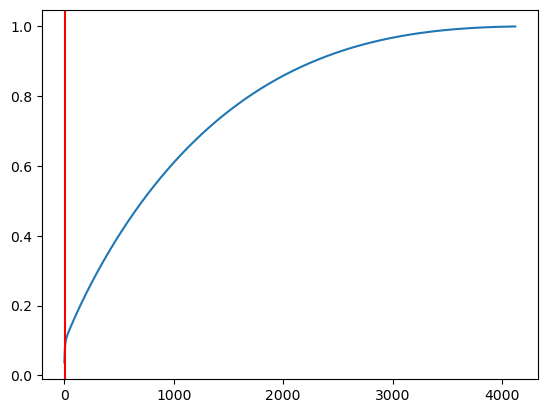

In [20]:
fig, ax = plt.subplots()      
ax = ax.plot(scree_data)
plt.axvline(x = 10, color = 'r', label = 'axvline - full height')


This has already been modified to be optimal.

# Try other algorithms like t-SNE or UMAP

In [21]:
# tic =time.time()

# # TIME THE T-SNE TO SEE IF IT IS FEASIBLE. TAKES A 1000 YEARS SO UNFEASIBLE. MAYBE PCA TO 50 AND THEN THIS? OR UMAP TEST.
# manifold.TSNE(n_components=10, learning_rate='auto',method="exact",
#                   init='random', perplexity=3).fit_transform(X_standardized)

# toc = time.time()
    
# exec_time = (toc-tic)/60
# print(exec_time)

In [27]:

X_embedded = manifold.TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=30,random_state=42).fit_transform(X_standardized)
X_embedded

array([[-3.9081123,  7.0383334],
       [ 4.522561 ,  2.5542798],
       [ 2.0103703, -4.8764963],
       ...,
       [ 0.9245176, -2.239888 ],
       [-3.293096 , -3.279543 ],
       [ 2.1239967, -3.2565706]], dtype=float32)

In [28]:
X_tsne = pd.DataFrame(X_embedded)

In [29]:
df_tsne_2 = pd.concat([df['label'],X_tsne],axis=1)

In [30]:
df_tsne_2

,label,0,1
0,TREG,-3.908112,7.038333
1,TREG,4.522561,2.554280
2,CD4+T,2.010370,-4.876496
3,CD4+T,-0.031128,-0.826206
4,CD4+T,0.075104,-1.148922
...,...,...,...
5466,CD4+T,-2.599561,-2.755101
5467,TREG,-0.898244,-1.813791
5468,TREG,0.924518,-2.239888
5469,CD4+T,-3.293096,-3.279543


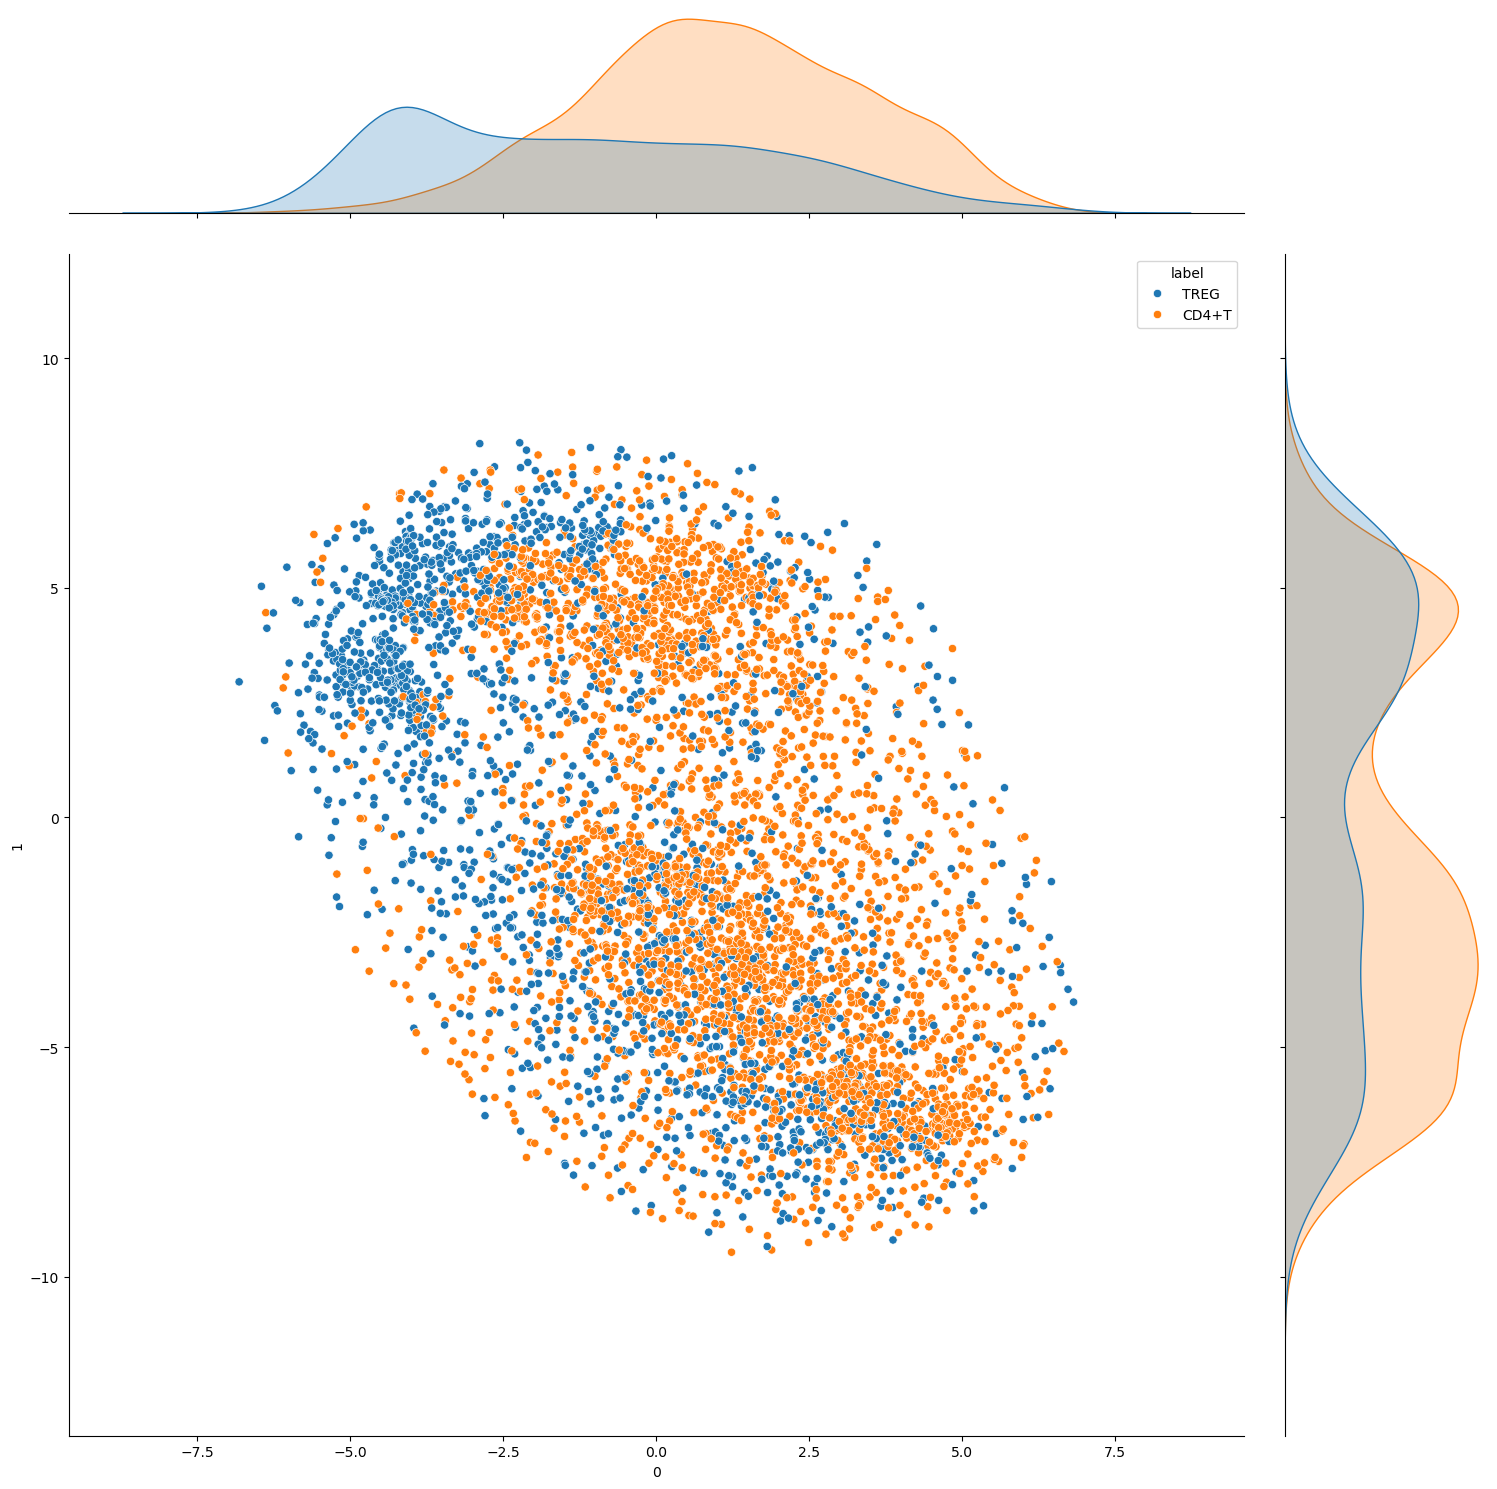

In [33]:
sns.jointplot(data=df_tsne_2, x=0, y=1, hue="label",height=15)
